In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
import ta

def sma_crossover_signal(df, window_list):
    """
    1 when close price is bigger than sma(window)
    0 when close price is not bigger than sma(window)
    """
    df.columns = [i.lower() for i in df.columns]
    close = pd.to_numeric(df.close)
    sma_crossover_ = pd.DataFrame()
    for w in window_list:
        sma_crossover_['sma_cross_{}'.format(w)] = np.floor(.5*(np.sign(close - close.rolling(w).mean())+1))
    return sma_crossover_

def rsi_signal(df, window_list):
    """
    1 when RSI is bigger than 50 and less than 70, or less than 30
    0 when RSI is opposite
    """
    df.columns = [i.lower() for i in df.columns]
    close = pd.to_numeric(df.close)
    rsi_signal_ = pd.DataFrame()
    for w in window_list:
        rsi = ta.momentum.rsi(close,w).rename('rsi').dropna()
        long = ~(~((rsi>=50) & (rsi<70)) & ~(rsi<=30))
        rsi = pd.Series(np.where(long,1,0), index=rsi.index)
        rsi_signal_['rsi_{}'.format(w)] = rsi
    return rsi_signal_

def bbpi_signal(df, window_list):
    """
    1 when Bollinger Band % index is bigger than 0.5 and less than 1.0, or less than 0
    0 when BBPI is is opposite
    """
    df.columns = [i.lower() for i in df.columns]
    close=pd.to_numeric(df.close)
    signal_=pd.DataFrame()
    for w in window_list:
        s = ta.volatility.bollinger_pband(close,w).rename('s').dropna()
        long = ~(~((s>=0.5) & (s<1)) & ~(s<=0))
        s = pd.Series(np.where(long,1,0), index=s.index)
        signal_['bbpi_{}'.format(w)] = s
    return signal_

def aroon_signal(df, window_list):
    """
    1 when aroon is positive
    0 when aroon is negative
    """
    df.columns = [i.lower() for i in df.columns]
    close = pd.to_numeric(df.close)
    signal_ = pd.DataFrame()
    for w in window_list:
        s = ta.trend.AroonIndicator(close,w).aroon_indicator().rename('s').dropna()
        long = s>=0
        s = pd.Series(np.where(long,1,0), index=s.index)
        signal_['aroon_{}'.format(w)] = s
    return signal_

def dpo_signal(df, window_list):
    """
    1 when DPO is positive
    0 when DPO is negative
    """
    df.columns = [i.lower() for i in df.columns]
    close = pd.to_numeric(df.close)
    signal_ = pd.DataFrame()
    for w in window_list:
        s = ta.trend.dpo(close,w).rename('s').dropna()
        long = s>=0
        s = pd.Series(np.where(long,1,0), index=s.index)
        signal_['dpo_{}'.format(w)] = s
    return signal_

def fi_signal(df, window_list):
    """
    1 when DPO is positive
    0 when DPO is negative
    """
    df.columns = [i.lower() for i in df.columns]
    close = pd.to_numeric(df.close)
    volume = pd.to_numeric(df.volume)
    signal_ = pd.DataFrame()
    for w in window_list:
        s = ta.volume.force_index(close,volume,w).rename('s').dropna()
        long = s>=0
        s = pd.Series(np.where(long,1,0), index=s.index)
        signal_['force_index_{}'.format(w)] = s
    return signal_


def eom_signal(df, window_list):
    """
    1 when Ease of movement is positive
    0 when EOM is negative
    """
    df.columns = [i.lower() for i in df.columns]
    close=pd.to_numeric(df.close);high=pd.to_numeric(df.high)
    open=pd.to_numeric(df.open);low=pd.to_numeric(df.low)
    volume=pd.to_numeric(df.volume)
    signal_=pd.DataFrame()
    for w in window_list:
        s = ta.volume.EaseOfMovementIndicator(high,low,volume,w).sma_ease_of_movement().rename('s').dropna()
        long = s>=0
        s = pd.Series(np.where(long,1,0), index=s.index)
        signal_['eom_{}'.format(w)] = s
    return signal_

def get_all_signal(df, window_list):
    """
    df: pd.DataFrame that includes high, low, close,open,volume columns
    window_list: list of windows/ ex.[20,60,120]
    """
    a = sma_crossover_signal(df,windows)
    b = rsi_signal(df,windows)
    c = bbpi_signal(df,windows)
    d = aroon_signal(df,windows)
    e = fi_signal(df,windows)
    g = eom_signal(df,windows)
    all = pd.concat([a,b,c,d,e,g],axis=1)
    return all

In [112]:
import FinanceDataReader as fdr
df = fdr.DataReader('005930','2005-1-1')

In [113]:
windows = np.arange(20,125,20)
matrix = get_all_signal(df, windows).dropna()

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [114]:
close = df.close

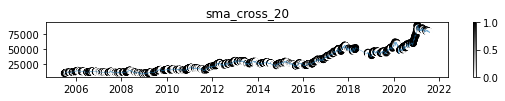

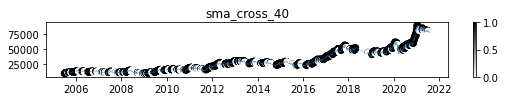

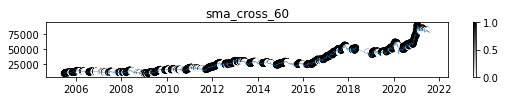

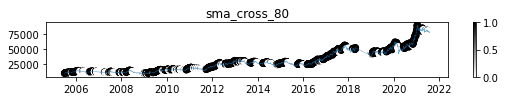

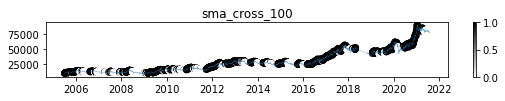

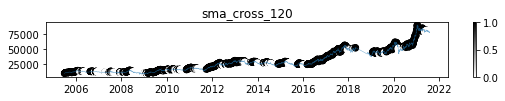

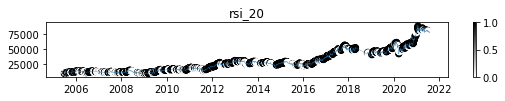

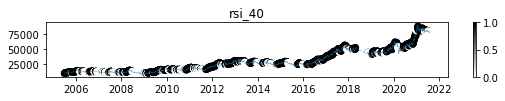

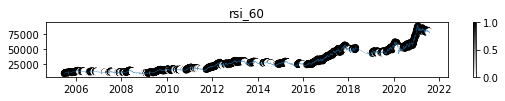

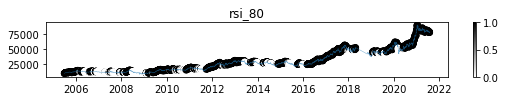

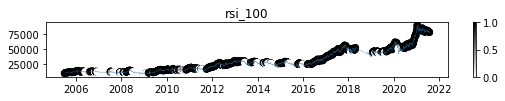

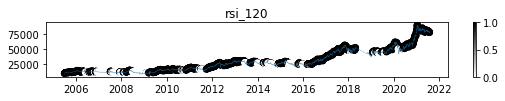

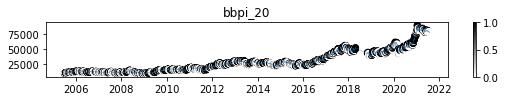

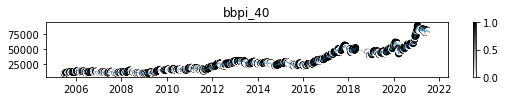

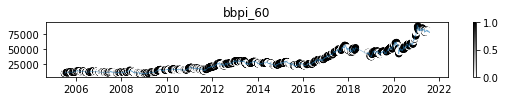

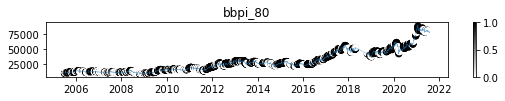

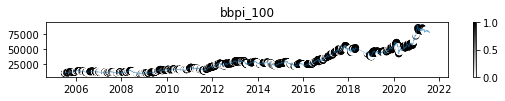

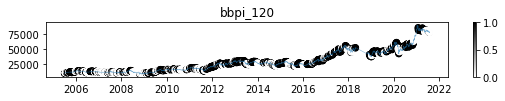

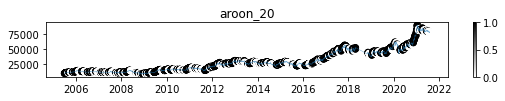

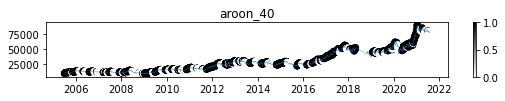

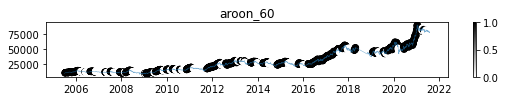

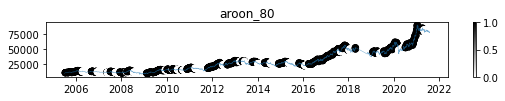

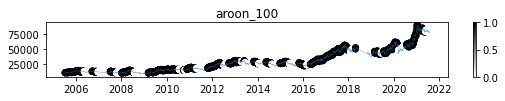

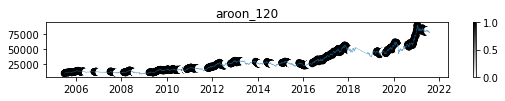

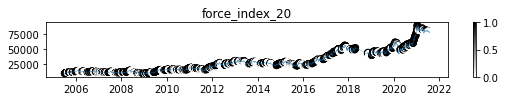

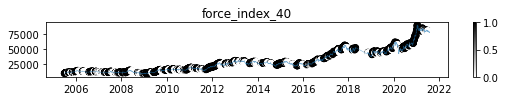

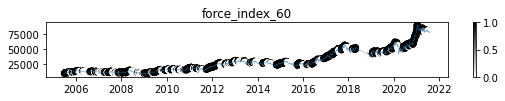

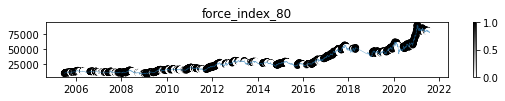

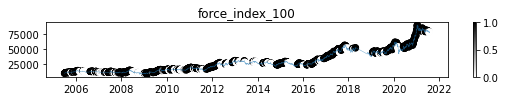

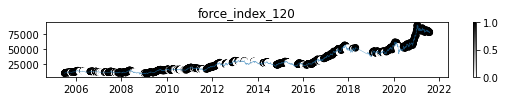

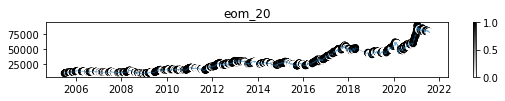

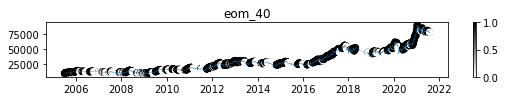

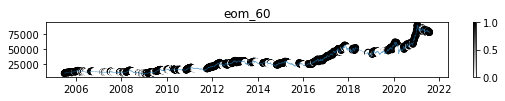

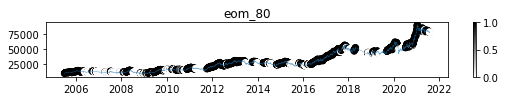

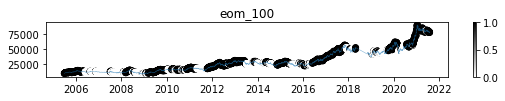

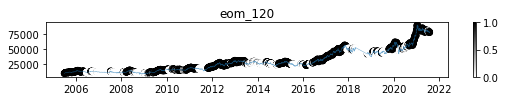

In [115]:
for i in matrix.columns:
    sc = matrix[i].copy()
    plt.figure(figsize=(9,1))
    plt.plot(close.loc[sc.index], linewidth=0.5,alpha=0.6)
    plt.scatter(close.loc[sc.index].index, close.loc[sc.index], c=sc,cmap='gray_r', alpha=1, vmin=0,vmax=1)
    plt.colorbar()
    plt.title('{}'.format(i))
    plt.show()